Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
import pandas as pd

train = pd.read_csv('https://raw.githubusercontent.com/aklefebvere/DS-Unit-2-Applied-Modeling/master/train-data.csv')
test = pd.read_csv('https://raw.githubusercontent.com/aklefebvere/DS-Unit-2-Applied-Modeling/master/test-data.csv')

# Target

In [2]:
# I will be predicting the price column of my dataset

target = 'Price'

y = train[target]

y.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

# Regression or Classification?
This will be a regression model since the
column I will be predicting contains continuous values
and it is not answering a yes/no, true/false question

# How is the target distributed?

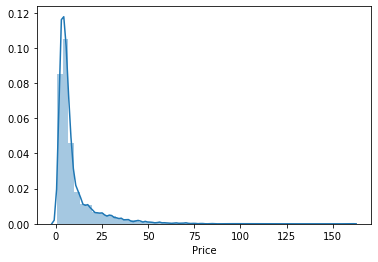

In [3]:
# The target is heavily right skewed
import seaborn as sns
sns.distplot(y);

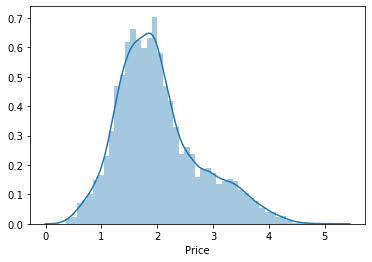

In [4]:
import numpy as np
y_log = np.log1p(y)
sns.distplot(y_log);

# Evaluation Metric?
I will be using MAE and R^2 as my evaluation metric for this model

# Train, Validation, test?
- The Dataset came with the train and test already split into two datasets
- I will split the train dataset into a new train and validation split (80 | 20 split)

# Data Cleaning

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

In [6]:
import math
def wrangle(df):
    # Create copy so it doesn't modify the origninal dataframe
    df = df.copy()
    
    # Columns to drop
    drop = ['New_Price', 'Unnamed_0']
    df = df.drop(columns=drop)
    
    # Unit conversions
    df = df.rename(columns={'Price': 'Price_Lakh'})
    df['Price_INR'] = df['Price_Lakh'] * 100000
    df['Price_USD'] = df['Price_INR'] * 0.013881
    
    # Zeros --> NaN (For Imputation)
    zero = ['Seats']
    for i in zero:
        df[zero] = df[zero].replace(0.0,np.NaN)
        
    # Strip characters
    for i, cell in enumerate(df['Power']):
        if cell == 'null bhp':
            df['Power'].iloc[i] = np.NaN
        elif type(cell) != np.float:
            df['Power'].iloc[i] = cell.strip(' bhp')
    
    df['Power'] = pd.to_numeric(df['Power'])
    
    return df
    

In [7]:
train = wrangle(train)

/home/adriann/anaconda3/envs/unit2/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
#test

In [10]:
train['Power'].iloc[0]

58.16